# (Fordgo bike tip data-2019-Jan and Feb)
## by Bimarsha Bhandari

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from zipfile import ZipFile
import requests
from io import BytesIO
import datetime
%matplotlib inline

**Data Sets urls**

> *"https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip",*

>  *"https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip"*

In [3]:
os.getcwd()

'/home/bimarsha/Documents/udacity/data-analyst/Part 5 Visualiztion/Project'

In [4]:
# bike_df = pd.read_csv("2017-fordgobike-tripdata.csv")

In [5]:
bike_1901 = pd.read_csv(os.path.join(os.getcwd(),'fordgobike-tripdata/201901-fordgobike-tripdata.csv'))
bike_1902 = pd.read_csv(os.path.join(os.getcwd(),'fordgobike-tripdata/201902-fordgobike-tripdata.csv'))

In [6]:
bike_df = bike_1901.append(bike_1902, ignore_index=False)

In [7]:
bike_df.shape
bike_df.reset_index(drop=True,inplace=True)


In [8]:
bike_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
100299,791,2019-01-18 15:46:12.7370,2019-01-18 15:59:24.6970,115.0,Jackson Playground,37.765026,-122.398773,369.0,Hyde St at Post St,37.787349,-122.416651,4797,Subscriber,No
279073,121,2019-02-17 11:17:47.8450,2019-02-17 11:19:49.1450,113.0,Franklin Square,37.764555,-122.410345,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,4761,Subscriber,No
143840,393,2019-01-10 12:36:50.0720,2019-01-10 12:43:24.0490,106.0,Sanchez St at 17th St,37.763242,-122.430675,112.0,Harrison St at 17th St,37.763847,-122.413004,5275,Subscriber,No
209586,205,2019-02-27 05:49:21.6340,2019-02-27 05:52:47.6100,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3090,Customer,No
272963,933,2019-02-18 14:28:56.9230,2019-02-18 14:44:30.6750,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3568,Subscriber,No


In [9]:
bike_df["start_time"] =  pd.to_datetime(bike_df["start_time"])  
bike_df["end_time"]  = pd.to_datetime(bike_df["end_time"])

In [10]:
bike_df['user_type'].value_counts()

Subscriber    332276
Customer       43218
Name: user_type, dtype: int64

In [11]:
bike_df.bike_share_for_all_trip = (bike_df.bike_share_for_all_trip == 'Yes')

In [12]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375494 entries, 0 to 375493
Data columns (total 14 columns):
duration_sec               375494 non-null int64
start_time                 375494 non-null datetime64[ns]
end_time                   375494 non-null datetime64[ns]
start_station_id           375049 non-null float64
start_station_name         375049 non-null object
start_station_latitude     375494 non-null float64
start_station_longitude    375494 non-null float64
end_station_id             375049 non-null float64
end_station_name           375049 non-null object
end_station_latitude       375494 non-null float64
end_station_longitude      375494 non-null float64
bike_id                    375494 non-null int64
user_type                  375494 non-null object
bike_share_for_all_trip    375494 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(3)
memory usage: 37.6+ MB


In [13]:
bike_df['bike_share_for_all_trip'].value_counts()

False    342061
True      33433
Name: bike_share_for_all_trip, dtype: int64

In [14]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,375494.000000,375049.000000,375494.000000,375494.000000,375049.000000,375494.000000,375494.000000,375494.000000
mean,738.802620,135.649976,37.772356,-122.355301,133.676109,37.772523,-122.354894,4245.834831
std,1733.118651,110.738521,0.095506,0.113290,110.540919,0.095410,0.112872,1632.577774
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,329.000000,44.000000,37.770407,-122.412408,42.000000,37.771058,-122.411726,3386.000000
50%,521.000000,100.000000,37.780955,-122.398436,98.000000,37.781010,-122.398285,4826.000000
75%,809.000000,223.000000,37.797280,-122.291360,219.000000,37.797280,-122.291415,5313.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000


**Create a different colum representing the week day for both the month January and February**

In [15]:
day=[]
for d in  bike_df.start_time.dt.date:
    date_np = np.datetime64(d)
    day.append(date_np.astype(datetime.datetime).weekday())
num_to_week = {1:"tue", 2:"wed", 3:"thu", 4:"fri", 5:"sat", 6:"sun", 0:"mon" }
week_day=[]
for val in day:
    week_day.append(num_to_week[val])

In [16]:
bike_df['week_day'] = week_day

**Test** : for the new column week day

In [17]:
bike_df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,week_day
189104,726,2019-01-02 07:56:23.717,2019-01-02 08:08:30.192,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5343,Customer,False,wed
343064,249,2019-02-06 17:45:04.027,2019-02-06 17:49:13.222,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,36.0,Folsom St at 3rd St,37.783830,-122.398870,856,Subscriber,False,wed
67909,354,2019-01-23 18:49:52.591,2019-01-23 18:55:46.893,58.0,Market St at 10th St,37.776619,-122.417385,99.0,Folsom St at 15th St,37.767037,-122.415443,4404,Subscriber,False,wed


In [18]:
# check for duplicated records/rows
bike_df.duplicated().sum()

0

**Create column reporting the hour the ride was started and ended**

In [19]:
bike_df['ride_start_hour'] = bike_df['start_time'].dt.hour
bike_df['ride_end_hour'] = bike_df['end_time'].dt.hour

### What is the structure of your dataset?

> There are total 375,494 observations with 14 columns. There features are 2 interger type , 2 datetime type, 1 bool type, 6 float type and 3 object(string) type.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is the duration of trip, week days, user type and start_time of each day.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features like start_station_id, end_station_id, longitude, latitude, user_type and bike_share_for_all_trip will help support my investigation.

## Univariate Exploration

**Duration of ride**

Text(0.5, 1.0, 'histogram of duration')

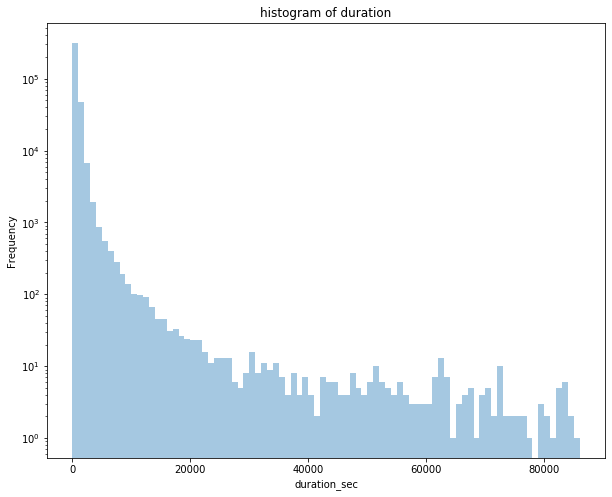

In [20]:
plt.subplots(figsize=(10,8))
np.random.seed(0)
x_bins = np.arange(0, bike_df['duration_sec'].max()+1000, 1000)
ax = sns.distplot(bike_df['duration_sec'],bins=x_bins,kde=False, vertical=False)
ax.set(yscale="log")
ax.set_ylabel("Frequency")
ax.set_title("histogram of duration")

> For the duration, it's right skewed graph hence its mean is greater than its mode.

**start_station_id**

/home/bimarsha/anaconda3/envs/ml-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/bimarsha/anaconda3/envs/ml-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'start station id histogram')

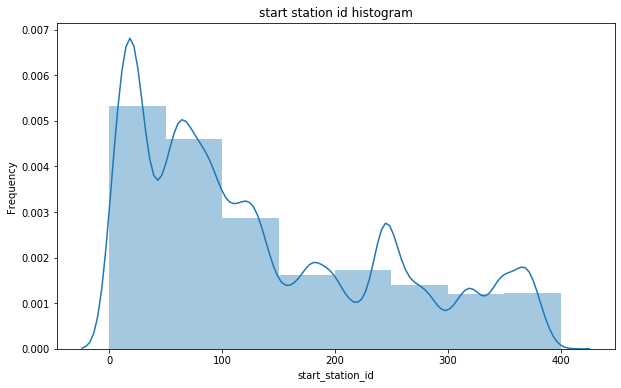

In [21]:
plt.subplots(figsize=(10,6))
np.random.seed(0)
x_bins = np.arange(0, bike_df["start_station_id"].max()+52, 50)
ax = sns.distplot(bike_df['start_station_id'],bins=x_bins, kde=True)
# ax.set(xscale="log", yscale="log")
ax.set_ylabel("Frequency")
ax.set_title("start station id histogram")

> This distribution is also right skewed.

**Starting Station Name** : Most common?

In [22]:
cmn_start_station = bike_df['start_station_name'].value_counts()[:15].sort_values()
type(cmn_start_station)

pandas.core.series.Series

Text(0.5, 1.0, 'Top 15 common starting stations')

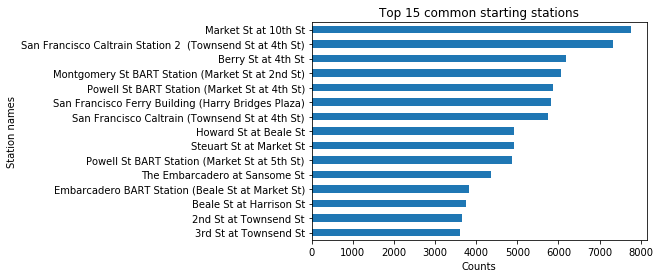

In [23]:
cmn_start_station.plot(kind = 'barh')
plt.xlabel("Counts")
plt.ylabel("Station names")
plt.title("Top 15 common starting stations")

> The most common starting station is 'Market St at 10th street'.

**Bike ID**

Text(0.5, 1.0, 'Bike Id histogram plot')

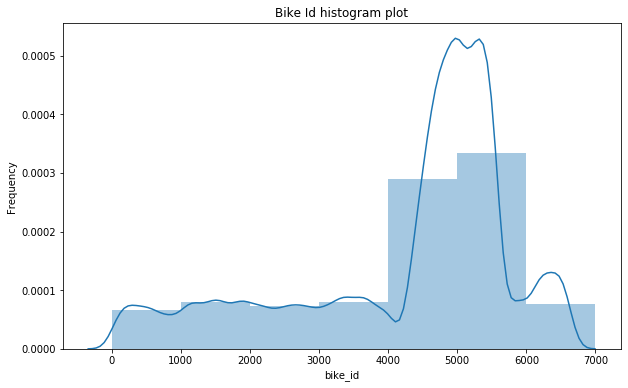

In [24]:
plt.subplots(figsize=(10,6))
np.random.seed(0)
x_bins = np.arange(0, bike_df["bike_id"].max()+1000, 1000)
ax = sns.distplot(bike_df['bike_id'],bins=x_bins, kde=True)
# ax.set(xscale="log", yscale="log")
ax.set_ylabel("Frequency")
ax.set_title("Bike Id histogram plot")

> This distribution is left skewed.

**User-Type**

Text(0.5, 1.0, 'Counts of type of user')

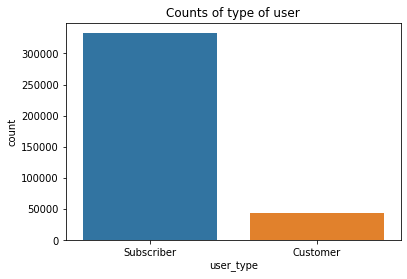

In [25]:
sns.countplot(x ='user_type', data = bike_df) 
plt.title("Counts of type of user")

> The subscriber for the bike are overwhelming than the non-subscriber customer.

**Week day counts**

In [26]:
# Ref: https://stackoverflow.com/questions/50247147/how-to-use-sort-index-with-specific-order-in-pandas
# we extract the value counts of week days and sort the days based on Monday-Sunday format
week_day_counts = pd.DataFrame(bike_df.week_day.value_counts())
week_day_counts.reset_index(inplace=True)
week_day_counts.columns = ["week_day", "counts"]
week_day_counts["week_day"] = pd.Categorical(week_day_counts["week_day"],["mon","tue","wed","thu","fri","sat","sun"])
week_day_counts.sort_values("week_day")

,week_day,counts
4,mon,55494
2,tue,63151
1,wed,65471
0,thu,73645
3,fri,57726
5,sat,32427
6,sun,27580


Text(0.5, 1.0, 'Ride counts in week days')

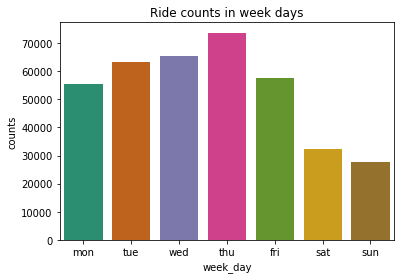

In [27]:
sns.barplot(x ='week_day',y='counts' ,data = week_day_counts, palette='Dark2') 
plt.title("Ride counts in week days")

> The number of rides are very low in the weekends. The ride counts increases every day from Monday to Thursday.Then there is deep decrease from Friday tp Sunday.

**Hourly changes of bike rides**

In [28]:
ride_start_df = bike_df.groupby('ride_start_hour').agg({'bike_id':'count'}).reset_index()

In [29]:
ride_start_df.columns = ['ride_start_hour','counts']

Text(0, 0.5, 'counts')

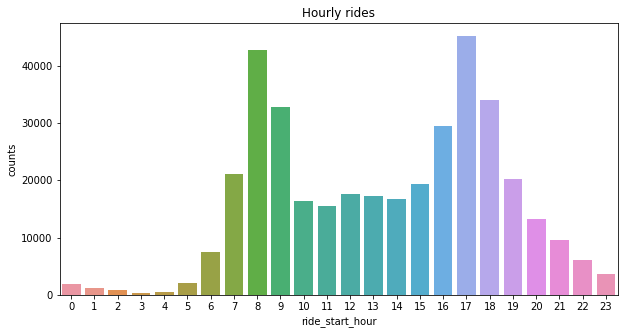

In [30]:
plt.subplots(figsize=(10,5))
ax_bar = sns.barplot(x="ride_start_hour", y="counts", data=ride_start_df)
ax_bar.set_title("Hourly rides")
ax_bar.set_xlabel("ride_start_hour")
ax_bar.set_ylabel("counts")

> It's clearly a bimodal graph with rides traffic at during office hours at 8am and 5pm. That means commuters influx clearly affect the rides taken.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [31]:
bike_df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,week_day,ride_start_hour,ride_end_hour
185481,1240,2019-01-02 17:12:08.681,2019-01-02 17:32:48.997,130.0,22nd St Caltrain Station,37.757718,-122.391813,122.0,19th St at Mission St,37.760299,-122.418892,4795,Subscriber,False,wed,17,17
3922,455,2019-01-31 16:41:40.529,2019-01-31 16:49:16.330,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,200,Subscriber,False,thu,16,16
226572,394,2019-02-23 23:47:23.815,2019-02-23 23:53:57.875,105.0,16th St at Prosper St,37.764285,-122.431804,56.0,Koshland Park,37.773414,-122.427317,5954,Subscriber,False,sat,23,23


In [32]:
duration_user_df = bike_df.groupby(["user_type", "week_day"]).size().reset_index()

Text(0, 0.5, 'size')

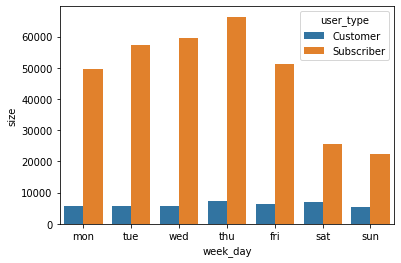

In [33]:
weekday=["mon","tue", "wed", "thu","fri","sat","sun"]
sns.barplot(data = duration_user_df,x="week_day",y=0, hue='user_type',order=weekday)
plt.ylabel("size")
# duration_user_df

> Customers riding bike is almost the same in all the week days implying to the tourists visitng the city. But the work days have
very high number of riders that increases upto thursday but decrease after that day. 

The mean durations are:  user_type
Customer      1460.425309
Subscriber     644.943631
Name: duration_sec, dtype: float64


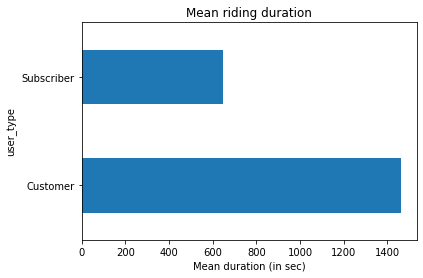

In [34]:

mean_durationr_df= bike_df.groupby("user_type")["duration_sec"].mean()
mean_durationr_df.plot(kind='barh')
plt.title("Mean riding duration")
plt.xlabel("Mean duration (in sec)")

print("The mean durations are: ", mean_durationr_df)

> We see that the subscribers actually ride less than half the duration compared to non-subscriber customers.This concludes that subscribers travel shorter distances to commute to work or school.

In [35]:
ride_hour_week_day_df = bike_df.groupby(["ride_start_hour", "week_day"]).size().reset_index()

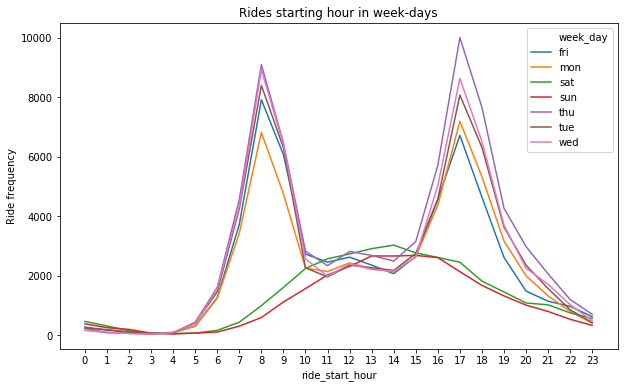

In [42]:
plt.subplots(figsize=(10,6))
sns.lineplot(data=ride_hour_week_day_df, x='ride_start_hour', y=0, hue='week_day')
plt.ylabel("Ride frequency")
plt.title("Rides starting hour in week-days")
plt.xticks(np.arange(0, 24, 1));

> The 8-9am and 5-6pm windows have high number of rides beacause of commuters on working days. But on the weekends, the number of rides is high in the 11am-5pm window which shows people travelling in the day.

## Multivariate Exploration

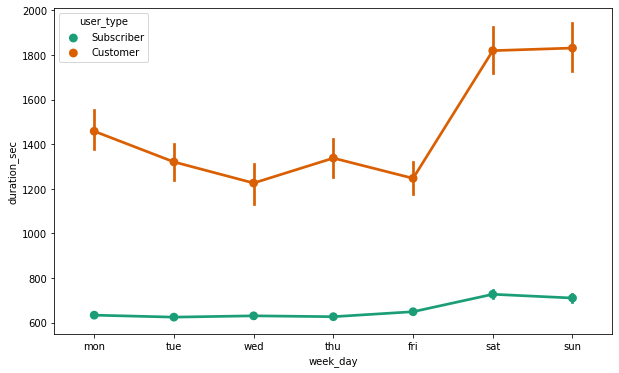

In [37]:
# Compare how duration differs in week days between two user types.
plt.subplots(figsize=(10,6))
# sns.barplot(x ='week_day',y='duration_sec',hue='user_type',data=bike_df ,palette='Dark2',order=weekday) 
sns.pointplot(x ='week_day',y='duration_sec',hue='user_type',data=bike_df ,palette='Dark2',order=weekday) 

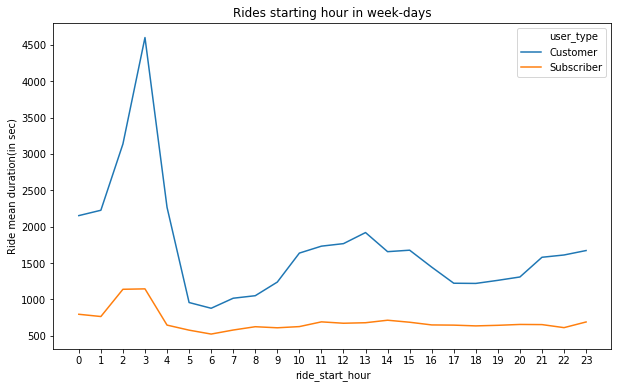

In [38]:
# Compare how mean duration differs in ride starting time in a day between two user types
starting_hour_users_mean_duration = bike_df.groupby(["ride_start_hour","user_type"]).mean()['duration_sec']
starting_hour_users_mean_duration = pd.DataFrame(starting_hour_users_mean_duration)
starting_hour_users_mean_duration.reset_index(inplace=True)

plt.subplots(figsize=(10,6))
sns.lineplot(data=starting_hour_users_mean_duration, x='ride_start_hour', y='duration_sec', hue='user_type')
plt.ylabel("Ride mean duration(in sec)")
plt.title("Rides starting hour in week-days")
plt.xticks(np.arange(0, 24, 1));